In [4]:
!pip install odfpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 717 kB 9.1 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=ce382c3d1768973ce435d82d0760180ef773475daed3f29217aea56e09b2355f
  Stored in directory: /root/.cache/pip/wheels/e2/f4/5d/a68c656235d33455a1d0f78e877acddfa006907a6d52d7e6ee
Successfully built odfpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
!wget https://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2013/tabelas_ods/01pessoas/01usointernet.ods
!wget https://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2014/Tabelas_de_Resultados/ods/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/01_Utilizacao_da_Internet.ods
!wget https://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2015/Tabelas_de_Resultados/ods/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/01_Utilizacao_da_Internet.ods

--2022-06-19 17:21:59--  https://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2013/tabelas_ods/01pessoas/01usointernet.ods
Resolving ftp.ibge.gov.br (ftp.ibge.gov.br)... 191.235.100.86
Connecting to ftp.ibge.gov.br (ftp.ibge.gov.br)|191.235.100.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272885 (266K) [application/vnd.oasis.opendocument.spreadsheet]
Saving to: ‘01usointernet.ods’

01usointernet.ods   100%[===================>] 266.49K   385KB/s    in 0.7s    

2022-06-19 17:22:01 (385 KB/s) - ‘01usointernet.ods’ saved [272885/272885]

--2022-06-19 17:22:01--  https://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2014/Tabelas_de_Resultados/ods/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/01_Utilizacao_da_Internet.ods
Resolving ftp.ibge.gov.br (ftp.ibge.gov.br)... 191.235.100.86
Connecting to ftp.ibge.gov.br (ftp.ibge.gov.br)|191.235.100.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267386 (261K) [application/vnd.oasis.op

In [26]:
arquivos = ["01usointernet.ods","01_Utilizacao_da_Internet.ods", "01_Utilizacao_da_Internet.ods.1"]

# Dataframe da Idade por Região

# Leitura separada pelo ano

In [128]:
dfs_idade_regiao = []
def ler(arquivos, dfs):
    for arq in arquivos:
        dfIdade = pd.read_excel(arq, sheet_name="Tab 1.1.2.1 a 1.1.2.3", usecols="A:G", header=4)
        dfs.append(dfIdade)

ler(arquivos, dfs_idade_regiao)

# Tratamento dos dados



Ao exibir pode-se notar, tabelas não nomeadas, assim como uma nota de fonte, e valores nulos, além de também os valores somados respectivos a cada sexo, que não é interessante manter para o estudo do dataframe, portanto deve-se tratar tudo isso.

In [39]:
dfs_idade_regiao[1]

,Unnamed: 0,Unnamed: 1,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
0,Total,95356.075,6412.201,20144.488,46107.871,14841.161,7850.354
1,10 a 14 anos,11057.668,803.903,2752.179,4832.138,1672.465,996.983
2,15 a 17 anos,8631.644,708.367,2324.066,3705.800,1234.981,658.430
3,18 ou 19 anos,5635.180,466.258,1510.757,2416.214,797.706,444.245
4,20 a 24 anos,12352.738,977.348,2968.260,5537.328,1822.943,1046.859
5,25 a 29 anos,11434.858,856.495,2573.709,5354.287,1676.467,973.900
6,30 a 34 anos,11185.759,755.217,2260.366,5482.167,1755.987,932.022
7,35 a 39 anos,9046.871,602.057,1685.258,4489.466,1452.412,817.678
8,40 a 44 anos,7636.492,453.127,1325.511,3971.191,1235.946,650.717
9,45 a 49 anos,6020.643,308.796,982.742,3203.070,1045.365,480.670


In [129]:
def tratar(dfs):
    for i in range(len(dfs)):
        dfs[i] = dfs[i].drop(dfs[i].index[[0, 13, 26, 39, 40]])
        dfs[i].rename(columns={'Unnamed: 0': 'Grupo de Idades', 'Unnamed: 1': 'Brasil'}, inplace=True)
tratar(dfs_idade_regiao)
dfs_idade_regiao[0]


,Grupo de Idades,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
1,10 a 14 anos,10783.226,725.355,2587.526,4889.733,1677.194,903.418
2,15 a 17 anos,8060.214,634.300,2049.379,3523.644,1184.240,668.651
3,18 ou 19 anos,5076.276,424.409,1247.823,2229.160,766.013,408.871
4,20 a 24 anos,11160.476,838.329,2604.753,5077.307,1698.644,941.443
5,25 a 29 anos,10213.670,705.847,2161.808,4913.158,1539.424,893.433
6,30 a 34 anos,10044.708,614.403,1973.991,5035.279,1556.768,864.267
7,35 a 39 anos,8154.923,477.491,1482.327,4255.841,1251.900,687.364
8,40 a 44 anos,6496.596,357.974,1161.722,3329.750,1117.711,529.439
9,45 a 49 anos,5396.742,235.479,867.607,2962.412,924.767,406.477
10,50 a 54 anos,4107.347,179.664,597.442,2267.551,757.653,305.037


# Separação dos dados


Podemos notar que os dados, de Homens e Mulheres assim como seus totais estão juntos, portanto é interessante separar cada um deles criando uma coluna por sexo.

In [130]:
def separar(dfs):
    newdfs = []
    for df in dfs:
        s = pd.Series([])
        dfIdadeHomen = df.iloc[12:24]  # Homens
        dfIdadeMulher = df.iloc[24:]  # Mulheres
        dfIdadeHomen.insert(7, "Sexo", "Masculino")
        dfIdadeMulher.insert(7, "Sexo", "Feminino")
        dfIdadeTotal = pd.concat([dfIdadeMulher, dfIdadeHomen], sort=False)
        newdfs.append(dfIdadeTotal)
    return newdfs
  
dfs_idade_regiao = separar(dfs_idade_regiao)
dfs_idade_regiao[0] #Dataframe das idades de homens por região de 2013 que utilizam a internet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,Grupo de Idades,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Sexo
27,10 a 14 anos,5332.255,378.807,1321.018,2377.126,816.135,439.169,Feminino
28,15 a 17 anos,4082.186,321.571,1052.854,1784.426,577.652,345.683,Feminino
29,18 ou 19 anos,2530.048,218.864,624.217,1104.004,373.197,209.766,Feminino
30,20 a 24 anos,5765.493,447.669,1405.225,2592.157,861.491,458.951,Feminino
31,25 a 29 anos,5384.401,373.758,1179.674,2557.703,812.081,461.185,Feminino
32,30 a 34 anos,5383.708,331.594,1073.471,2691.018,817.635,469.990,Feminino
33,35 a 39 anos,4383.065,258.432,821.223,2258.751,661.457,383.202,Feminino
34,40 a 44 anos,3486.484,203.113,656.086,1767.699,580.118,279.468,Feminino
35,45 a 49 anos,2836.514,123.498,469.449,1545.077,487.291,211.199,Feminino
36,50 a 54 anos,2162.144,92.053,306.163,1190.885,417.770,155.273,Feminino


# Tipos e nomes dos dados

Ambos os dados são do tipo float, exceto a coluna grupo de idade e sexo que é object, além disso não possuem valores nulos, isso vale para todos os dataframes separados também.

In [99]:
dfs_idade_regiao[0].dtypes

Grupo de Idades     object
Brasil             float64
Norte              float64
Nordeste           float64
Sudeste            float64
Sul                float64
Centro-Oeste       float64
Sexo                object
dtype: object

In [100]:
dfs_idade_regiao[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 27 to 25
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Grupo de Idades  24 non-null     object 
 1   Brasil           24 non-null     float64
 2   Norte            24 non-null     float64
 3   Nordeste         24 non-null     float64
 4   Sudeste          24 non-null     float64
 5   Sul              24 non-null     float64
 6   Centro-Oeste     24 non-null     float64
 7   Sexo             24 non-null     object 
dtypes: float64(6), object(2)
memory usage: 1.7+ KB


# Média, Mediana e desvio padrão
Abaixo estão valores referentes aos grupos de idades conforme a utilização de internet em diferentes regiões do Brasil.

In [101]:
print("\nAno de 2013")
print(dfs_idade_regiao[0].describe())
print("\nAno de 2014")
print(dfs_idade_regiao[1].describe())
print("\nAno de 2015")
print(dfs_idade_regiao[2].describe())


Ano de 2013
            Brasil       Norte     Nordeste      Sudeste         Sul  \
count    24.000000   24.000000    24.000000    24.000000   24.000000   
mean   3565.502458  224.038708   732.455458  1754.642708  562.298125   
std    1486.454551  127.834497   396.801651   641.493959  213.972077   
min    1320.984000   33.433000   179.580000   754.001000  235.873000   
25%    2438.072000  106.999000   375.159250  1119.868000  387.911250   
50%    3629.171000  218.961500   658.595000  1753.458500  578.885000   
75%    4955.015500  331.717750  1058.008250  2360.872750  757.370000   
max    5765.493000  447.669000  1405.225000  2691.018000  861.491000   

       Centro-Oeste  
count     24.000000  
mean     292.067458  
std      137.918059  
min       91.317000  
25%      185.276750  
50%      291.815000  
75%      433.978250  
max      482.492000  

Ano de 2014
            Brasil       Norte     Nordeste      Sudeste         Sul  \
count    24.000000   24.000000    24.000000    24.00000

# Grupo de idade que mais utilizam a internet no Brasil

---



In [104]:
print("\nAno de 2013")
i = dfs_idade_regiao[0][dfs_idade_regiao[0]['Brasil']==dfs_idade_regiao[0]['Brasil'].max()].index[0]
print(dfs_idade_regiao[0]['Grupo de Idades'][i])
print("\nAno de 2014")
i = dfs_idade_regiao[1][dfs_idade_regiao[1]['Brasil']==dfs_idade_regiao[1]['Brasil'].max()].index[0]
print(dfs_idade_regiao[1]['Grupo de Idades'][i])
print("\nAno de 2015")
i = dfs_idade_regiao[2][dfs_idade_regiao[2]['Brasil']==dfs_idade_regiao[2]['Brasil'].max()].index[0]
print(dfs_idade_regiao[2]['Grupo de Idades'][i])


Ano de 2013
20 a 24 anos

Ano de 2014
20 a 24 anos

Ano de 2015
20 a 24 anos


# Total de usúarios masculinos e femininos usuários da internet

In [110]:
print("\nAno de 2013")
print("Total de Homens:")
print(dfs_idade_regiao[0]['Brasil'][dfs_idade_regiao[0]['Sexo'] == 'Masculino'].sum())
print("Total de Mulheres:")
print(dfs_idade_regiao[0]['Brasil'][dfs_idade_regiao[0]['Sexo'] == 'Feminino'].sum())
print("\nAno de 2014")
print("Total de Homens:")
print(dfs_idade_regiao[1]['Brasil'][dfs_idade_regiao[1]['Sexo'] == 'Masculino'].sum())
print("Total de Mulheres:")
print(dfs_idade_regiao[1]['Brasil'][dfs_idade_regiao[1]['Sexo'] == 'Feminino'].sum())
print("\nAno de 2015")
print("Total de Homens:")
print(dfs_idade_regiao[2]['Brasil'][dfs_idade_regiao[2]['Sexo'] == 'Masculino'].sum())
print("Total de Mulheres:")
print(dfs_idade_regiao[2]['Brasil'][dfs_idade_regiao[2]['Sexo'] == 'Feminino'].sum())


Ano de 2013
Total de Homens:
41172.767
Total de Mulheres:
44399.292

Ano de 2014
Total de Homens:
45580.367
Total de Mulheres:
49775.708000000006

Ano de 2015
Total de Homens:
48591.545999999995
Total de Mulheres:
53491.543999999994


# Gráficos a respeitos das idades e região

# Grupo de Idades x Usuários de internet do Brasil em 2013

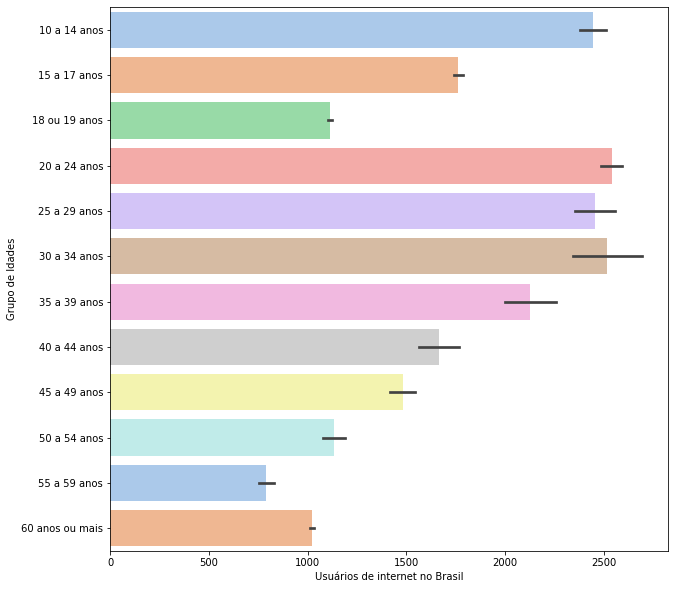

In [118]:
plt.figure(figsize=(10,10))
g=sns.barplot(data=dfs_idade_regiao[0], x='Sudeste', y='Grupo de Idades',palette="pastel", orient='h')
g.set_xlabel('Usuários de internet no Brasil')
plt.show()

# Grupo de Idades x Usuários de internet do Brasil em 2013 dividido por sexo


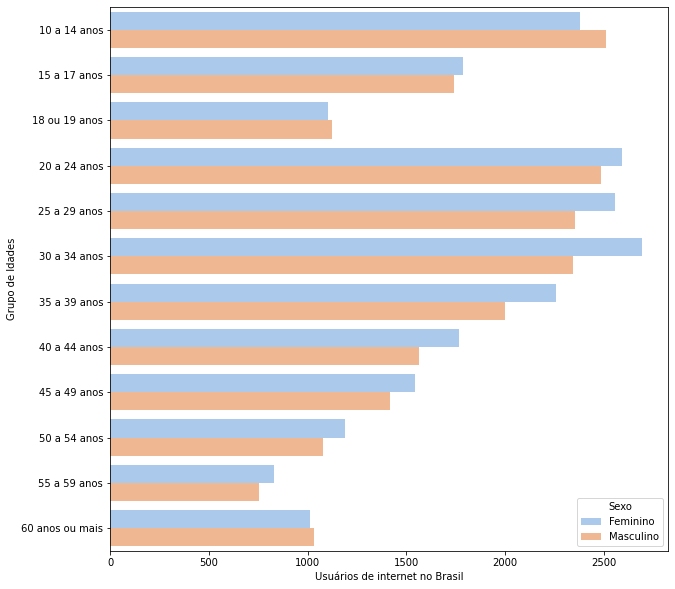

In [120]:
plt.figure(figsize=(10,10))
g=sns.barplot(data=dfs_idade_regiao[0], x='Sudeste', y='Grupo de Idades',palette="pastel",hue = "Sexo", orient='h')
g.set_xlabel('Usuários de internet no Brasil')
plt.show()

# Comparação entre Usuários no Brasil ao longo dos anos

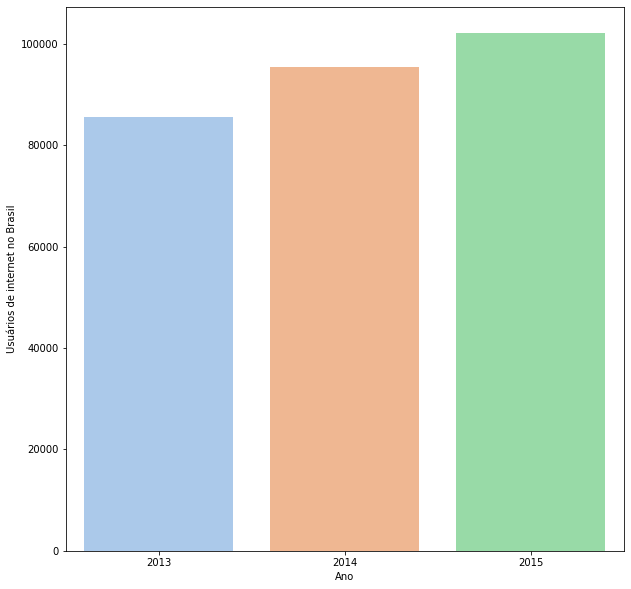

In [152]:
newdf1 = dfs_idade_regiao[0].copy()
newdf2 = dfs_idade_regiao[1].copy()
newdf3 = dfs_idade_regiao[2].copy()
newdf1.insert(8,"Ano","2013")
newdf2.insert(8,"Ano","2014")
newdf3.insert(8,"Ano","2015")
newdf = pd.concat([newdf1,newdf2,newdf3], sort=False)
plt.figure(figsize=(10,10))
groupIdades = newdf.groupby('Ano').sum().reset_index()
g=sns.barplot(data=groupIdades, x='Ano', y='Brasil',palette="pastel", orient='v')
g.set_ylabel('Usuários de internet no Brasil')
plt.show()